# Lab 4: Simple Linear Regression (SLR)

We will use the cars2010 data to explore the relationship between the Fuel Economy (FE) and various predictors in the dataset using data exploration techniques, then simple linear regression. We will use EngDispl, NumCyl, ExhaustValvesPerCyl, and VarValveTiming as the predictors that we will explore for the following questions.

In [2]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, stat_qq, stat_qq_line, geom_boxplot, coord_flip, geom_vline, geom_hline, geom_histogram, facet_grid, geom_point
import statsmodels.stats.multicomp as mc
import statsmodels.formula.api as smf
import scipy

In [3]:
cars = pd.read_csv('https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/cars2010.csv')

In [4]:
cars

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,3.2,6,S6,30.4926,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,SpecialPurposeVehicleSUV4WD,1,0
1103,3.0,6,S6,29.7892,Turbocharged,6,1,0,AllWheelDrive,2,2,SpecialPurposeVehicleSUV4WD,1,0
1104,3.2,6,S6,30.4926,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,SpecialPurposeVehicleSUV4WD,1,0
1105,3.2,6,S6,29.7431,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,SpecialPurposeVehicleSUV4WD,1,0


### Question 1a

Create scatter plots of the 4 predictors by FE. Can it be reasonably said that each of the variables all have a linear relationship with FE?

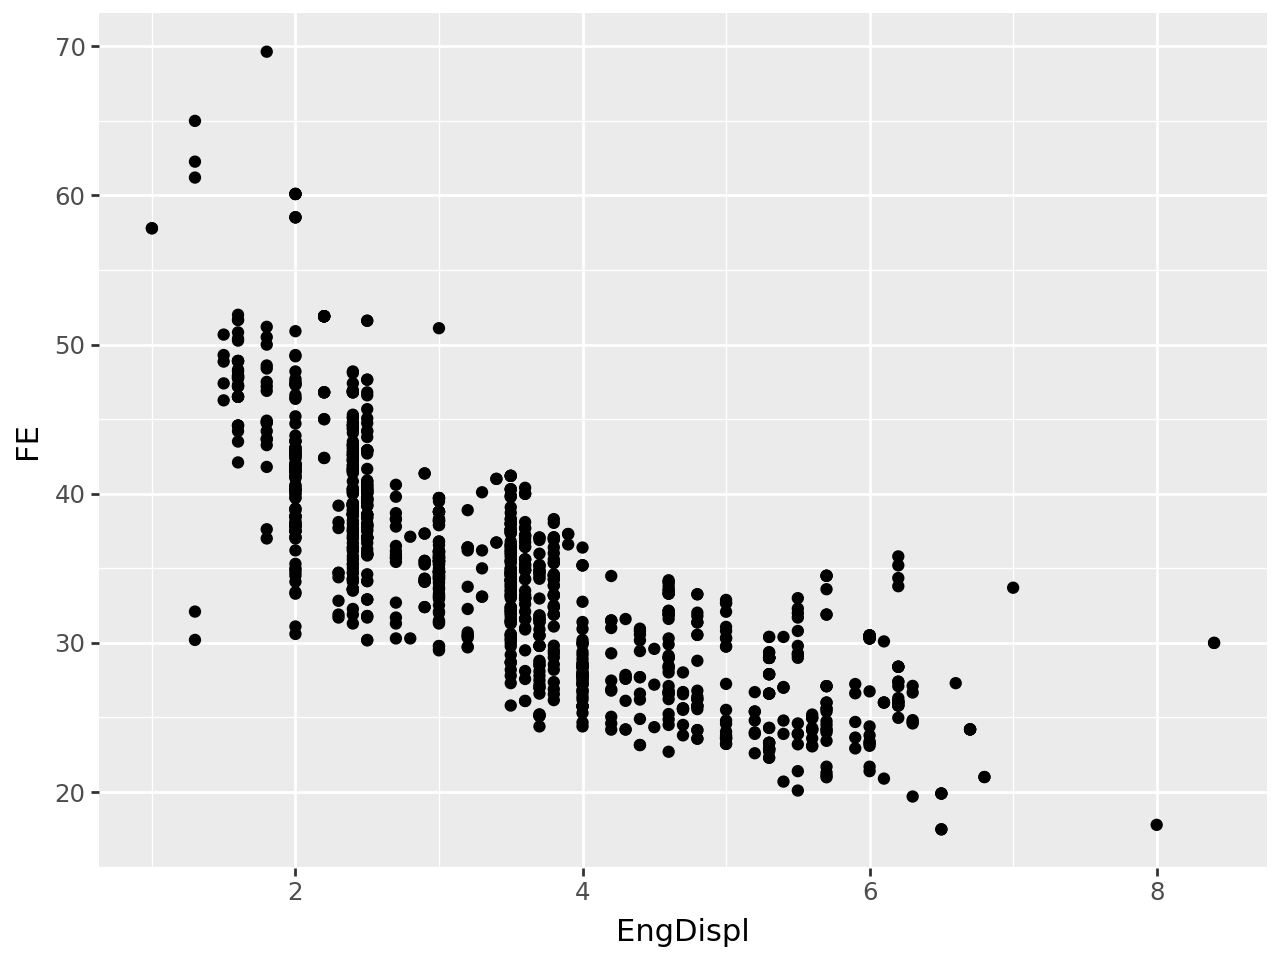

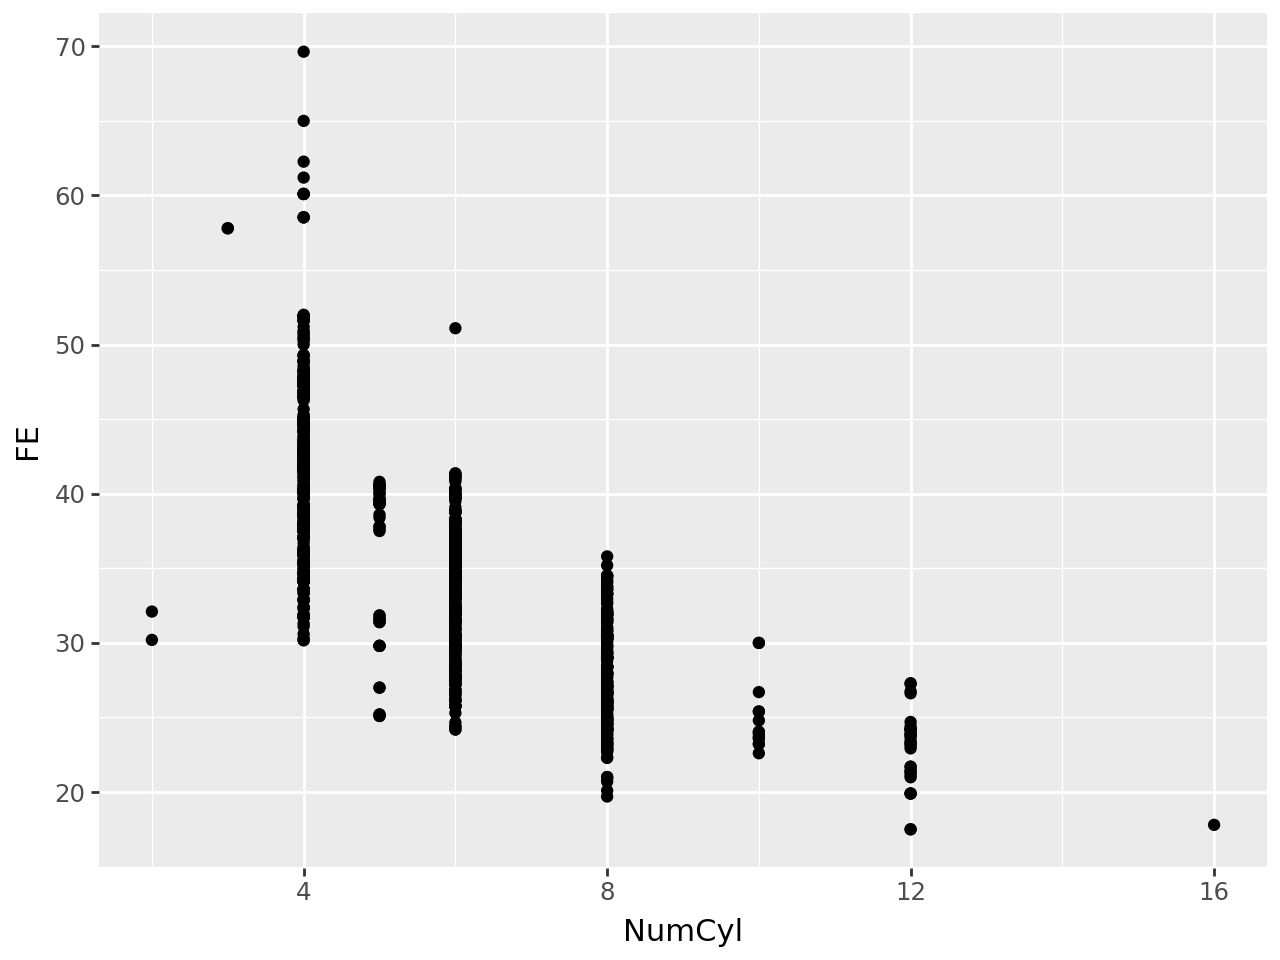

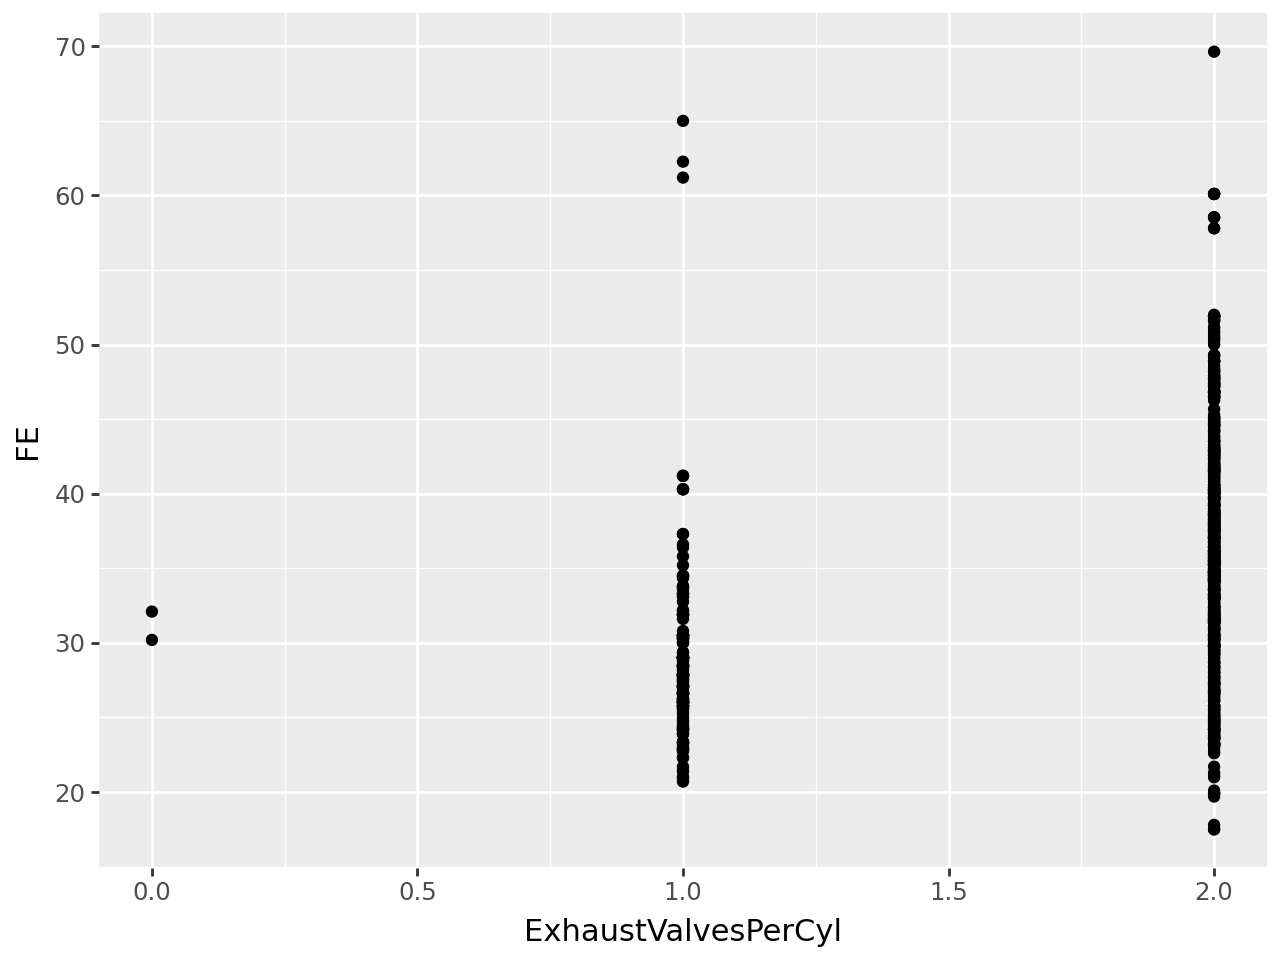

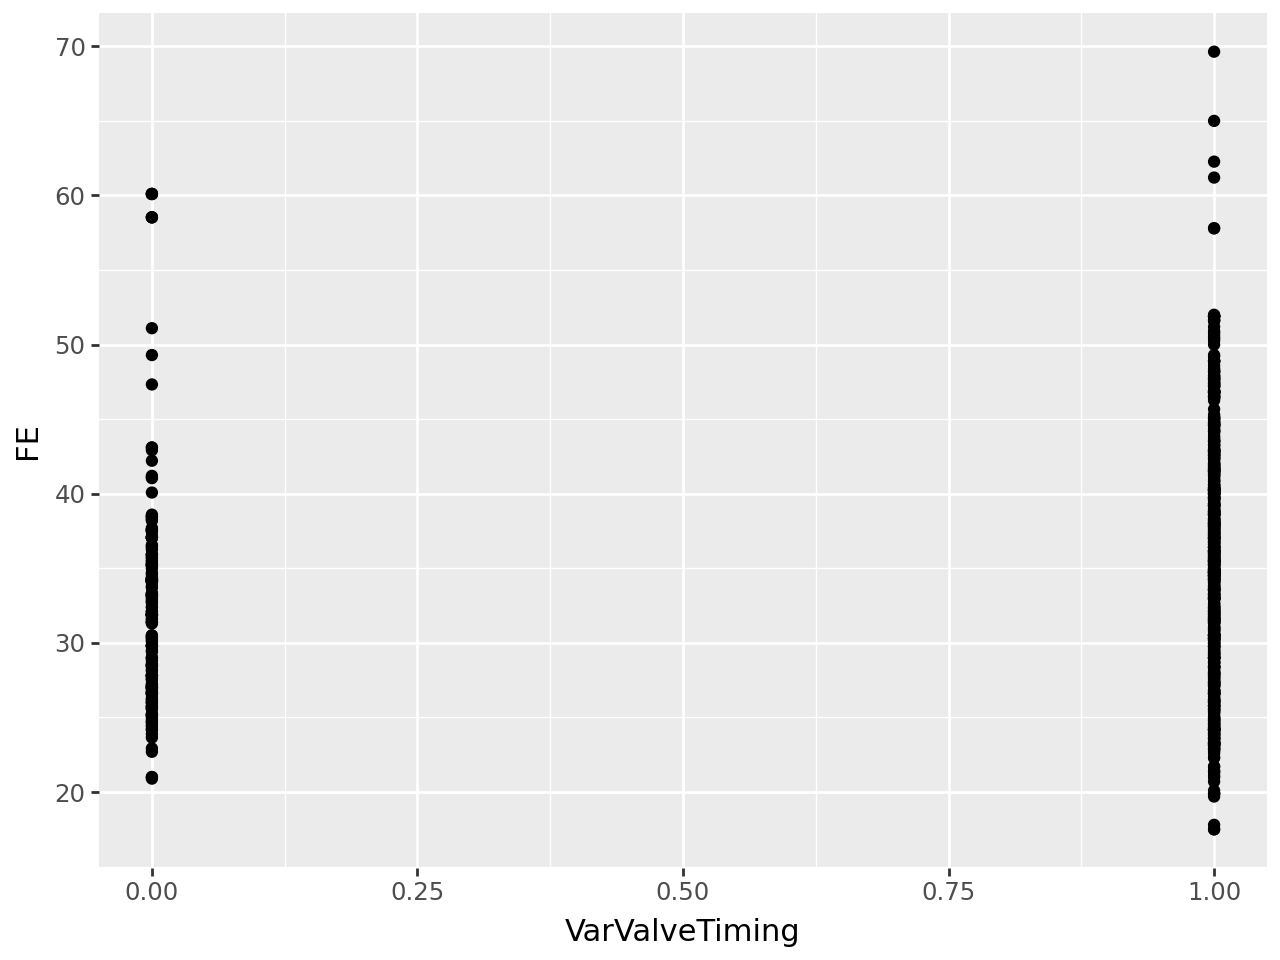

In [5]:
engdispl_fe_scatter = (ggplot(cars, aes(x = 'EngDispl', y = 'FE')) +
                        geom_point())
                        
numcyl_fe_scatter = (ggplot(cars, aes(x = 'NumCyl', y = 'FE')) +
                        geom_point())

exhaustvalvespercyl_fe_scatter = (ggplot(cars, aes(x = 'ExhaustValvesPerCyl', y = 'FE')) +
                        geom_point())

varvalvetiming_fe_scatter = (ggplot(cars, aes(x = 'VarValveTiming', y = 'FE')) +
                        geom_point())

engdispl_fe_scatter.show()
numcyl_fe_scatter.show()
exhaustvalvespercyl_fe_scatter.show()
varvalvetiming_fe_scatter.show()

Answer: Tentatively, all four treatment seem to have at least a weak linear relationship with fuel efficiency

## Question 1b
What is the correlation between FE and EngDispl? (Round to 3 decimal places)

In [6]:
engdispl_fe_r, engdispl_fe_p = scipy.stats.pearsonr(cars['FE'], cars['EngDispl'])
print(f"Engine displacement vs. fuel efficiency: r = {engdispl_fe_r:.3f}, p-value = {engdispl_fe_p:.2e}")

Engine displacement vs. fuel efficiency: r = -0.787, p-value = 2.09e-234


## Question 1c
What is the correlation between FE and NumCyl? (Round to 3 decimal places)

In [7]:
numcyl_fe_r, numcyl_fe_p = scipy.stats.pearsonr(cars['FE'], cars['NumCyl'])
print(f"Number of cylinders vs. fuel efficiency: r = {numcyl_fe_r:.3f}, p-value = {numcyl_fe_p:.2e}")

Number of cylinders vs. fuel efficiency: r = -0.740, p-value = 1.04e-192


## Question 1d
What is the correlation between FE and ExhaustValvesPerCyl? (Round to 3 decimal places)

In [8]:
exhaustvalvespercyl_fe_r, exhaustvalvespercyl_fe_p = scipy.stats.pearsonr(cars['FE'], cars['ExhaustValvesPerCyl'])
print(f"Exhaust valves per cylinder vs. fuel efficiency: r = {exhaustvalvespercyl_fe_r:.3f}, p-value = {exhaustvalvespercyl_fe_p:.2e}")

Exhaust valves per cylinder vs. fuel efficiency: r = 0.336, p-value = 1.48e-30


## Question 1e
What is the correlation between FE and VarValveTiming? (Round to 4 decimal places)

In [9]:
varvalvetiming_fe_r, varvalvetiming_fe_p = scipy.stats.pearsonr(cars['FE'], cars['VarValveTiming'])
print(f"Variable valve timing vs. fuel efficiency: r = {varvalvetiming_fe_r:.3f}, p-value = {varvalvetiming_fe_p:.2e}")

Variable valve timing vs. fuel efficiency: r = 0.125, p-value = 3.06e-05


## Question 1f
What is the variable with the largest correlation?

Answer: EngDispl with r = -0.787

## Question 1g
Is the p-value for the correlation in part f statistically significant?

Answer: Yes with p = 2.09e-234

## Question 1h
What can we conclude from the p-value in part g?

Answer: There is a linear relationship between FE and EngDispl because the correlation was significant

__________
For parts i) - o),  fit a simple linear regression model with FE as the response and EngDispl as the predictor.
__________

In [10]:
engdispl_fe_ols = smf.ols("FE ~ EngDispl", data = cars).fit()
print(engdispl_fe_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                     FE   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     1803.
Date:                Tue, 08 Jul 2025   Prob (F-statistic):          2.09e-234
Time:                        18:21:58   Log-Likelihood:                -3264.9
No. Observations:                1107   AIC:                             6534.
Df Residuals:                    1105   BIC:                             6544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.5632      0.398    126.890      0.0

## Question 1i
What is the r-squared value? (round to 3 decimals)

Answer: 0.620

## Question 1j
What is the adj r-squared value? (round to 3 decimals)

Answer: 0.620

## Question 1k
What is the F-statistic for the model? (round to 1 decimal)

Answer: 1803.0

## Question 1l
Is the model statistically significant?

Answer: Yes

## Question 1m
What is the estimate for EngDispl? (round to 4 decimals)

Answer: -4.5209

## Question 1n
What is the t-statistic for the EngDispl estimate? (round to 3 decimals)

Answer: -42.460

## Question 1o
Is the EngDispl estimate statistically significant?

Answer: Yes

## Question Set 2

The IceCream dataset has two columns: sales, which gives the total daily sales of a local ice cream shop in hundreds of dollars, and temperature, which reflects the daily high temperature. Use this information to answer the following questions:

In [11]:
icecream = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/icecream.csv")
icecream = icecream.dropna()

## Question 2a
Is the relationship between sales and temperature reasonably linear?

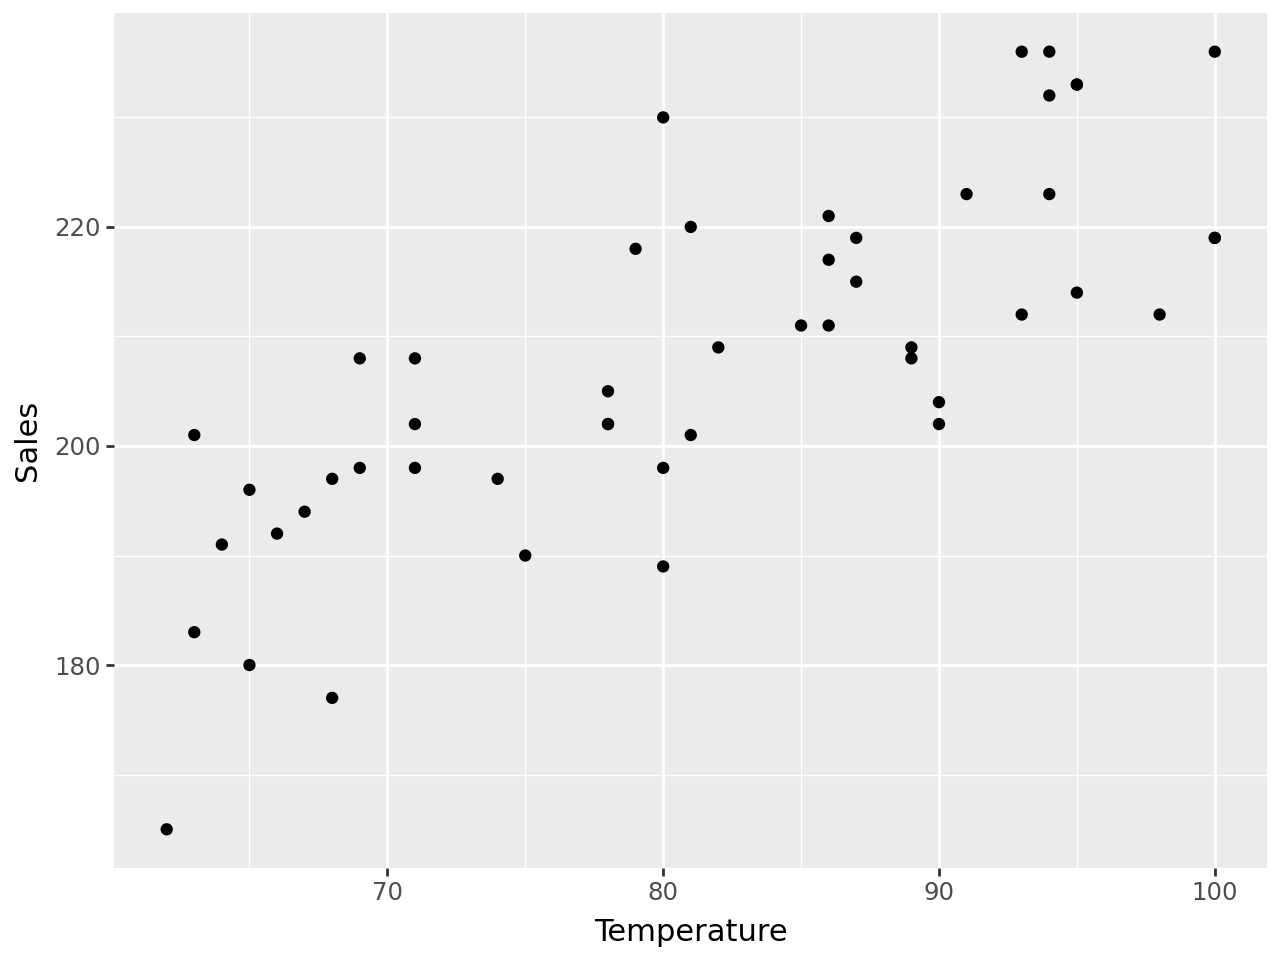

In [12]:
ice_cream_sales_vs_temp_scatter = (ggplot(icecream, aes(x = 'Temperature', y = 'Sales')) +
geom_point())

ice_cream_sales_vs_temp_scatter.show()

Answer: Yes

## Question 2b
What is the correlation coefficient of Sales vs Temperature? (round to 4 decimals)

In [13]:
ice_cream_sales_vs_temp_r, ice_cream_sales_vs_temp_p_val = scipy.stats.pearsonr(icecream['Temperature'], icecream['Sales'])
print(f"Ice cream vs. temperature correlation: r = {ice_cream_sales_vs_temp_r:.4f}, p-value = {ice_cream_sales_vs_temp_p_val:.2e}")

Ice cream vs. temperature correlation: r = 0.7845, p-value = 1.57e-11


## Question 2c
Is the correlation statistically significant?

Answer: Yes at p = 1.57e-11

__________
For parts d) - h) run an SLR predicting daily sales from temperature
__________

In [14]:
ice_cream_temp_vs_sales_ols = smf.ols("Sales ~ Temperature", data = icecream).fit()
print(ice_cream_temp_vs_sales_ols.summary())
icecream['residuals'] = ice_cream_temp_vs_sales_ols.resid
icecream['predicted_vals'] = ice_cream_temp_vs_sales_ols.predict()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     76.84
Date:                Tue, 08 Jul 2025   Prob (F-statistic):           1.57e-11
Time:                        18:21:59   Log-Likelihood:                -185.49
No. Observations:                  50   AIC:                             375.0
Df Residuals:                      48   BIC:                             378.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     119.2974     10.210     11.684      

## Question 2d
Does temperature have a statistically significant effect on daily sales?

Answer: Yes

## Question 2e
What value/values from the output can be used to determine the answer in part d (Hint: Since it's SLR, think about the hypothesis for each inference being made)?

Answer: Temperature t-statistic & Model F-statistic

## Question 2f
Are the errors normally distributed?

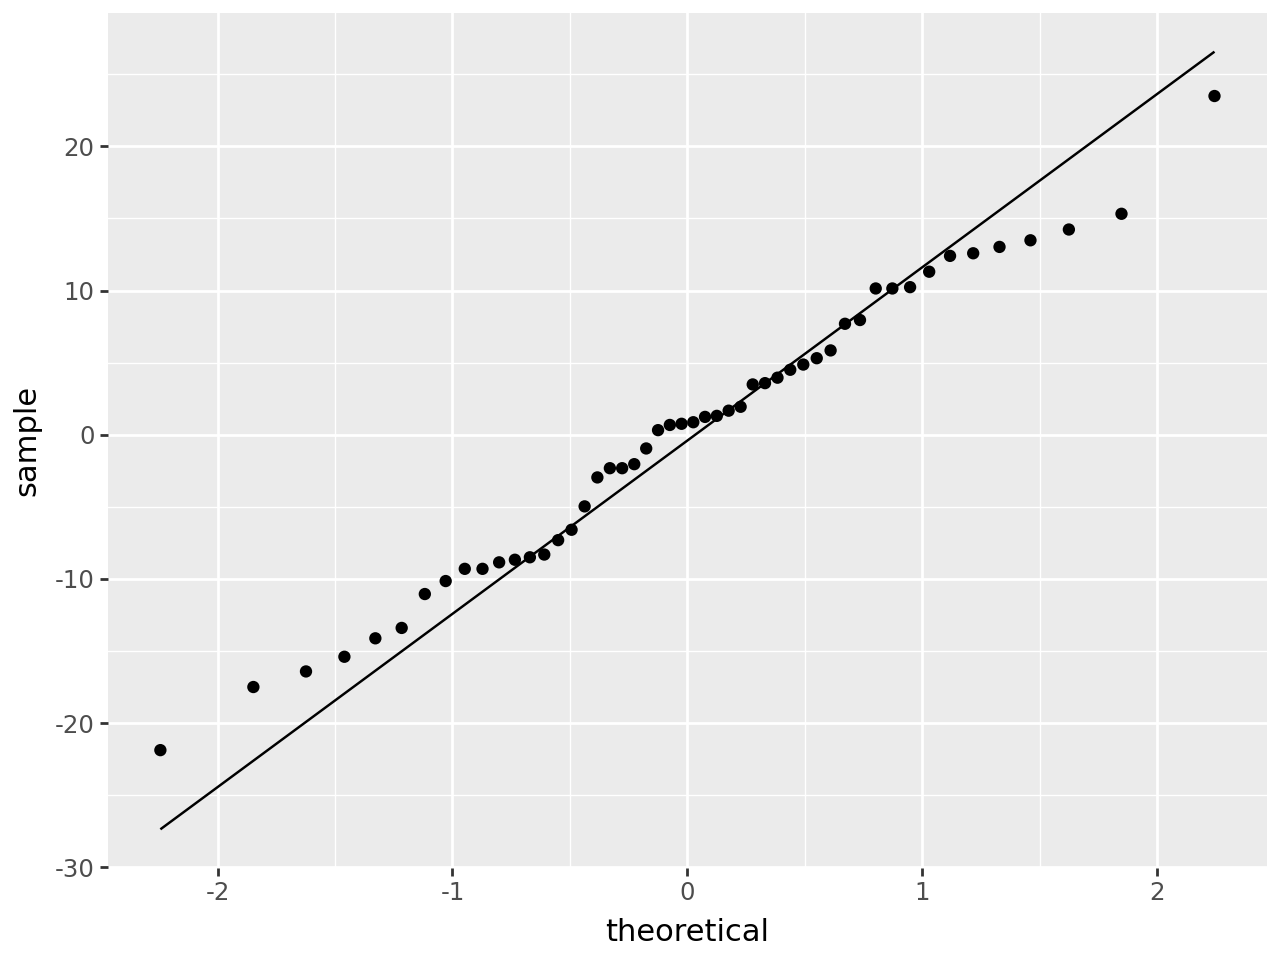

In [15]:
ice_cream_ols_qq = (ggplot(icecream, aes(sample = 'residuals'))+
stat_qq() +
stat_qq_line())

ice_cream_ols_qq.show()

In [16]:
shapiro_stat, shapiro_p = scipy.stats.shapiro(icecream['residuals'])
print(f"The shapiro test statistic for the residuals is {shapiro_stat:.3f} and the p-value is {shapiro_p:.3f}")

The shapiro test statistic for the residuals is 0.986 and the p-value is 0.819


Answer: The residuals appear normally distributed

## Question 2g
Is the non-constant variance of the errors assumption satisfied?

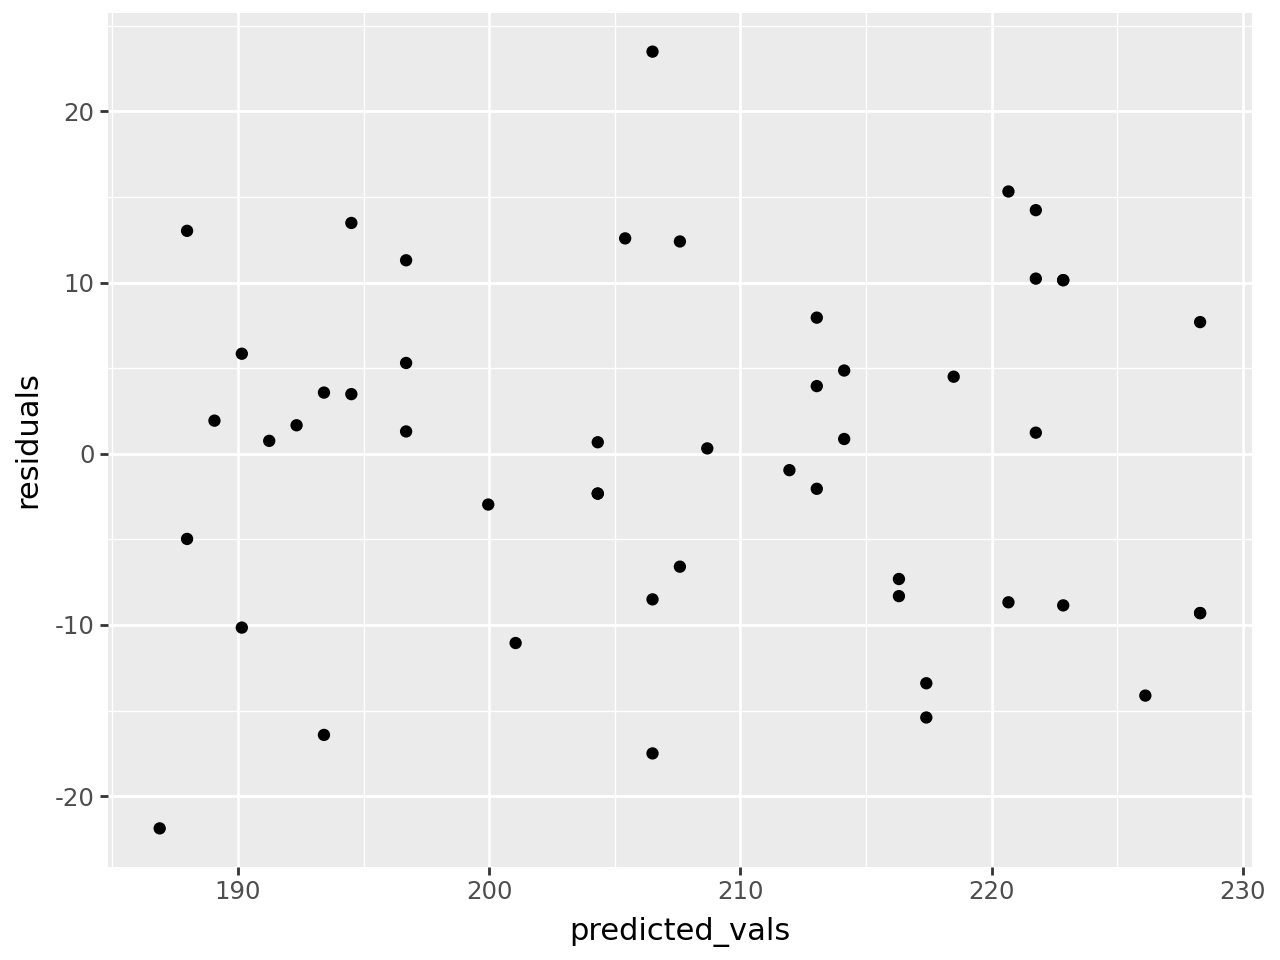

In [17]:
ice_cream_residual_scatter = (ggplot(icecream, aes(x = 'predicted_vals', y = 'residuals')) +
geom_point())

ice_cream_residual_scatter.show()

Answer: Yes

## Question 2h
For a 1 unit increase in temperature, on average, how much are the daily sales expected to increase (in hundreds of dollars)? Round to 2 decimal places.

Answer: 1.09